<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [83]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



## Load and Prepare Data

In [10]:
# @title Default title text
# Load the uploaded files to explore their contents
train_file_path = '/train.csv'
test_file_path = '/test.csv'

# Read the CSV files
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Display the first few rows of the data for EDA
train_data.head(), test_data.head()

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
z= train_data.iloc[:, :-1]
type(z)

pandas.core.frame.DataFrame

In [12]:
z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148


In [16]:
X = train_data.iloc[:, :-1].values  #  Selects all columns except the last one as features (X)
y = train_data.iloc[:, -1].values   # Selects the last column as the target (y)

print(y)


type(y)

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' nan 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

numpy.ndarray

## EDA

In [8]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Descriptive statistics
descriptive_stats = train_data.describe()

# Display the results
missing_values, descriptive_stats

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std 

In [18]:
# Creating a copy of the dataframe
df_fillna = train_data.copy()

# Filling missing values for Age with the mean
df_fillna['Age'].fillna(df_fillna['Age'].mean(), inplace=True)

# Filling missing values for Cabin with 'Unknown' (as it may not make sense to impute)
df_fillna['Cabin'].fillna('Unknown', inplace=True)

# Filling missing values for Embarked with the most frequent value (mode)
df_fillna['Embarked'].fillna(df_fillna['Embarked'].mode()[0], inplace=True)

# Checking if missing values are handled
df_fillna.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
df_fillna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [46]:
# Selecting only numeric columns for the correlation heatmap
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])

In [47]:
# Performing one-hot encoding using pandas for the categorical columns
df_encoded_pandas = pd.get_dummies(df_fillna, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)

# Displaying the first few rows to verify the encoding
df_encoded_pandas.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,...,False,False,False,False,False,False,False,False,False,True


In [48]:
df_encoded_pandas

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,True,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,True,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,False,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,True,...,False,False,False,False,False,False,False,False,False,False


In [49]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [50]:
# Define X and y after performing one-hot encoding
X = df_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']].values
y = df_encoded['Survived'].values

# Print the target variable y
print(y)


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

## Data Preprocessing

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
print(X_train)

[[3 29.69911764705882 2 ... True True False]
 [1 30.0 0 ... False False False]
 [2 34.0 0 ... False False True]
 ...
 [2 21.0 0 ... True False True]
 [3 29.69911764705882 0 ... False False True]
 [3 21.0 0 ... True False True]]


In [53]:
print(X_test)

[[1 48.0 0 ... False False True]
 [3 29.69911764705882 0 ... True False True]
 [2 17.0 0 ... False False True]
 ...
 [3 29.69911764705882 0 ... True True False]
 [3 21.0 0 ... True True False]
 [3 5.0 2 ... False False False]]


In [54]:
print(y_train)

[1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 

In [55]:
print(y_test)

[1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1]


In [76]:
# Create a StandardScaler object
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Display the first few rows of the scaled features
X_scaled[:5]


array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
         0.73769513, -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
        -1.35557354, -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
        -1.35557354, -0.30756234,  0.61583843],
       [-1.56610693,  0.40792596,  0.43279337, -0.47367361,  0.42073024,
        -1.35557354, -0.30756234,  0.61583843],
       [ 0.82737724,  0.40792596, -0.4745452 , -0.47367361, -0.48633742,
         0.73769513, -0.30756234,  0.61583843]])

In [77]:
print(X_train)

[[ 0.83659324 -0.02810499  1.49105341 ...  0.73334642  3.18198052
  -1.61685287]
 [-1.55559305 -0.00541218 -0.48959963 ... -1.36361202 -0.31426968
  -1.61685287]
 [-0.35949991  0.29627125 -0.48959963 ... -1.36361202 -0.31426968
   0.61848547]
 ...
 [-0.35949991 -0.6841999  -0.48959963 ...  0.73334642 -0.31426968
   0.61848547]
 [ 0.83659324 -0.02810499 -0.48959963 ... -1.36361202 -0.31426968
   0.61848547]
 [ 0.83659324 -0.6841999  -0.48959963 ...  0.73334642 -0.31426968
   0.61848547]]


In [78]:
print(X_test)

[[-1.55559305  1.35216325 -0.48959963 ... -1.36361202 -0.31426968
   0.61848547]
 [ 0.83659324 -0.02810499 -0.48959963 ...  0.73334642 -0.31426968
   0.61848547]
 [-0.35949991 -0.98588332 -0.48959963 ... -1.36361202 -0.31426968
   0.61848547]
 ...
 [ 0.83659324 -0.02810499 -0.48959963 ...  0.73334642  3.18198052
  -1.61685287]
 [ 0.83659324 -0.6841999  -0.48959963 ...  0.73334642  3.18198052
  -1.61685287]
 [ 0.83659324 -1.89093361  1.49105341 ... -1.36361202 -0.31426968
  -1.61685287]]


## Strorytelling - Visualization

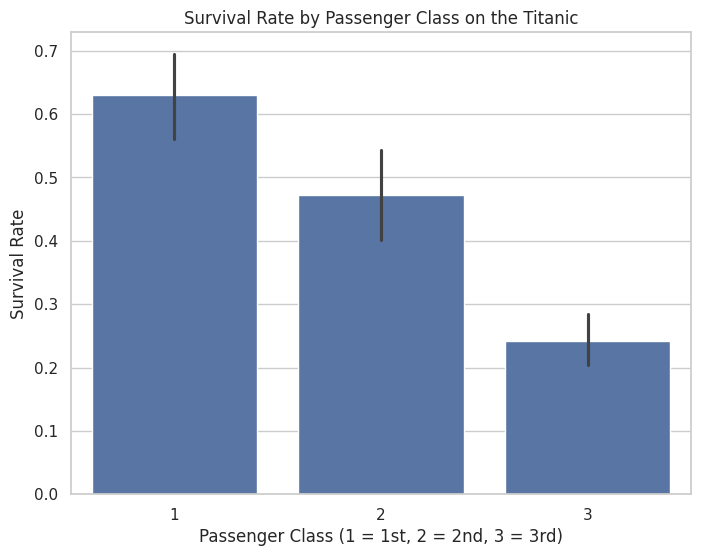

In [79]:
# Let's visualize the survival rate based on passenger class (Pclass)

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class on the Titanic')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()


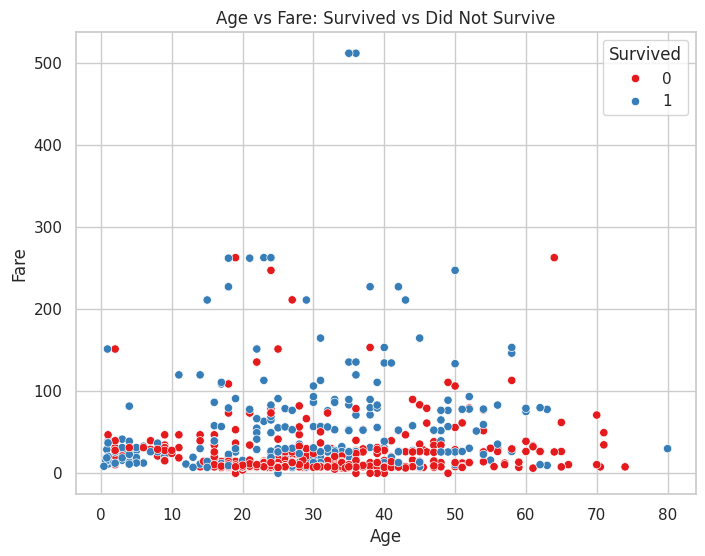

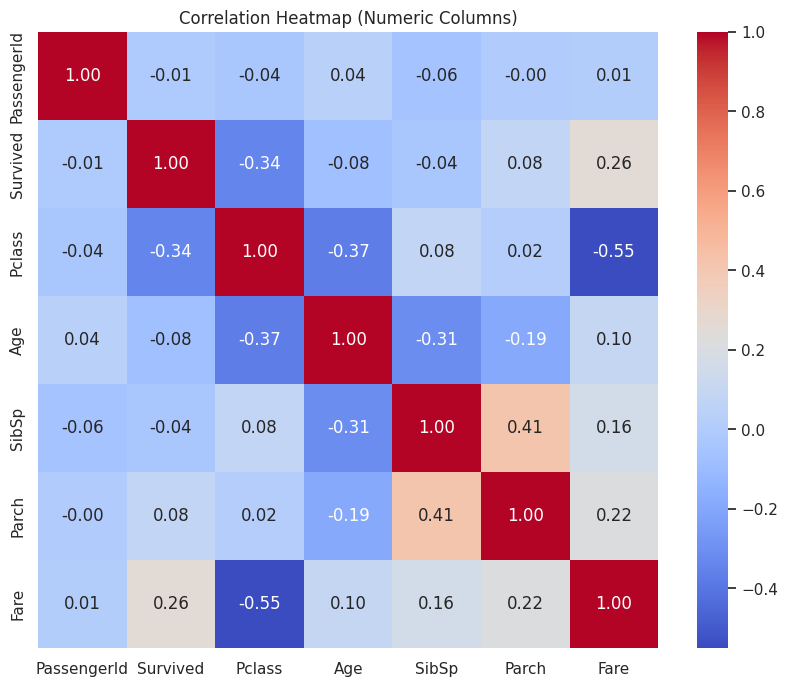

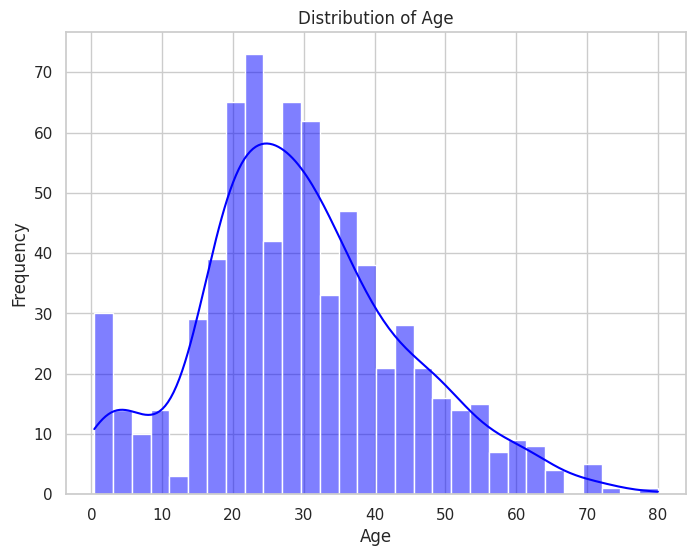

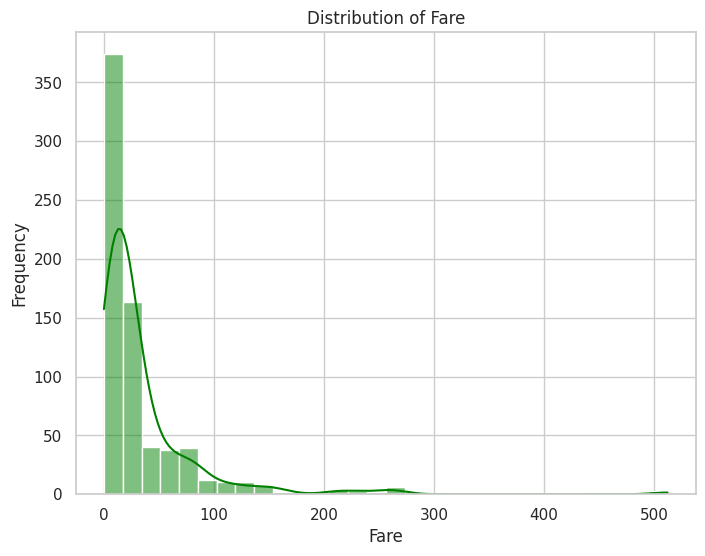

In [80]:
# Redefining the cleaned dataset by removing rows with missing values in key columns
train_df_cleaned = train_data[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']].dropna()

# Scatter plot for Age vs Fare colored by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df_cleaned, palette='Set1')
plt.title('Age vs Fare: Survived vs Did Not Survive')
plt.show()

# Creating a correlation heatmap once again to visualize the relationships between numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

# Distribution plot for Age
plt.figure(figsize=(8, 6))
sns.histplot(train_df_cleaned['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for Fare
plt.figure(figsize=(8, 6))
sns.histplot(train_df_cleaned['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()




## Train your model (Classification)

In [81]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8044692737430168
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.77      0.74      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [82]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn}")
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


KNN Classifier Accuracy: 0.7653631284916201
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       106
           1       0.79      0.58      0.67        73

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179



In [84]:
# 1. Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# 2. Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 3. SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# 4. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Decision Tree Accuracy: 0.7653631284916201
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.64      0.69        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

Random Forest Accuracy: 0.7877094972067039
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       106
           1       0.82      0.62      0.70        73

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

SVM Accuracy: 0.776536312849162
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       106
      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7932960893854749
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       106
           1       0.83      0.62      0.71        73

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.80      0.79      0.79       179



## Test Result

In [85]:
# Evaluating the models

# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# KNN Evaluation
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn}")
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Decision Tree Evaluation
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

# Random Forest Evaluation
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# SVM Evaluation
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.8044692737430168
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.77      0.74      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

KNN Classifier Accuracy: 0.7653631284916201
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       106
           1       0.79      0.58      0.67        73

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179

Decision Tree Accuracy: 0.7653631284916201
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.85   

## Send us the Result (Maktabkhoone)